<a href="https://colab.research.google.com/github/aka-hombre/MAT422/blob/main/MAT422_HW3_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import re
import random
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from IPython.display import display, Latex
from sympy import *
from collections import Counter
from scipy.stats import poisson,norm
from scipy.integrate import quad

from mpl_toolkits import mplot3d

#3.3.1 Necessary and sufficient conditions of local minimizers

When we doing optimization, we frequently want to find the minimum values of our objective function. This means some conditions have to be in order.
For our necessary conditions: **If $x_o$ is a local minimiaer,**
*  $\nabla f(x_0) = 0$, where $f$ is continously differentiable.
* $\mathbf{H}_f(x_0)$ is PSD, ie. squaresymmetrix $dxd$ matrix, that is positive-semi-definite, where $f$ is twice continously differentiable.

Sufficient condition:
If $\nabla f(x_0)=0$ and $\mathbf{H}_f(x_0)$ is positive definite, then $x_0$ is a strict global minimizer.  

Let's consider the following example: $f(x,y) =x^2-y^2$ and $x_0=(0, 0)$. Then

\begin{equation}
\nabla f(x,y) = \begin{pmatrix}2x\\2y\end{pmatrix}\bigg|_{f(0,0)}=(0,0)\\
\mathbf{H}_f(0,0) = \begin{pmatrix}2& 0 \\ 0&-2\end{pmatrix}
\end{equation}

lets see if our hessian is positive and semi definite:

In [4]:
H = np.array([[2,0],[0,-2]])
l, v = np.linalg.eig(H)
print("Our eigenvalues are:")
print(l)

Our eigenvalues are:
[ 2. -2.]


Since there exists a negativve eigenvalue, our hessian is not PSD, and therfore out point $x_0$, is not a local minimizer.

#3.3.2 Convexity and global minimizers

We are in optimization intrested in convex funcitons, because having $\nabla f(x_0)=0$ is a sufficient and therfore necessary condition for a minimizer. Further it is a global minimizer. **Note:** In our above example, the funciton was not convex.

We could think of this intuitively, for example with a standard quadratic equation $f(x)=ax^2+bx+c$, where $a>0$:

we find $f'(x_0)=2ax_0+b=0$. We know $f''(x)=2a >0$, so therefore $x_0$ is a global minimum.

Let's look at another function

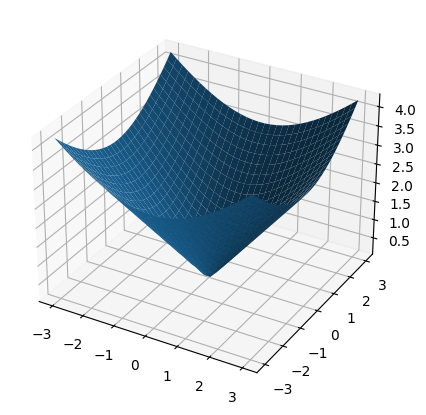

In [9]:
x = np.outer(np.linspace(-3, 3, 32), np.ones(32))
y = x.copy().T # transpose
z = (np.sqrt(np.power(x, 2)+np.power(y,2)))

# Creating figure
fig = plt.figure(figsize =(5, 7))
ax = plt.axes(projection ='3d')

# Creating plot
ax.plot_surface(x, y, z)

# show plot
plt.show()

our function $\nabla f(0,0)=0$ indicates our point is a global min. We can also see this is obiously a global min, since our funciton is convex.

#3.3.3 Gradient descent

We will return to our least-squares problem, and find  
\begin{equation}
\min_{x\in\mathbb{R}^2}||Ax-b||^2
\end{equation}

using the gradient descent algorithm, with randomly generated data.


Optimal intercept: 3.518574684516237, Optimal slope: 3.3482724664692975


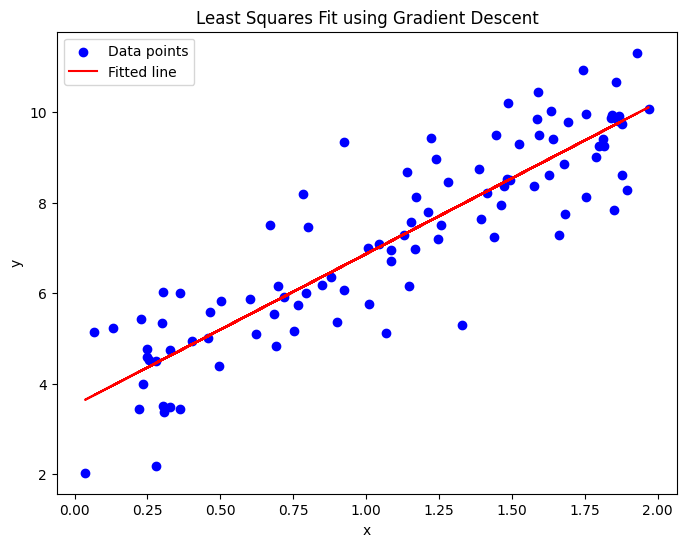

In [37]:
m = 100  # Number of data points
A = 2 * np.random.rand(m, 1)
b = 4 + 3 * A + np.random.randn(m, 1)  # b = 4 + 3x + noise

# Add a column of ones to A for the intercept term (y = mx + c)
A_b = np.c_[np.ones((m, 1)), A]

# Initialize parameters (x0, x1), where x0 is intercept and x1 is slope
x = np.random.randn(2, 1)

# Gradient Descent settings
learning_rate = 0.1
n_iterations = 100
m = len(b)  # Number of data points


# Gradient Descent function
def gradient_descent(A_b, b, x, learning_rate, n_iterations):
    cost_history = []
    for i in range(n_iterations):
        gradients = 2/m * A_b.T.dot(A_b.dot(x) - b)  # Compute gradients
        x = x - learning_rate * gradients  # Update x
    return x

# Perform gradient descent
optimal_x = gradient_descent(A_b, b, x, learning_rate, n_iterations)

# Print the optimal parameters (intercept and slope)
print(f"Optimal intercept: {optimal_x[0][0]}, Optimal slope: {optimal_x[1][0]}")

# Plotting the results
plt.figure(figsize=(8, 6))
plt.scatter(A, b, color="blue", label="Data points")
plt.plot(A, A_b.dot(optimal_x), color="red", label="Fitted line")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Least Squares Fit using Gradient Descent")
plt.legend()
plt.show()
